# 04-loading-more-data.ipynb
This notebook continues exploring loading data using the library Pandas

In [1]:
# Standard library imports
from pathlib import Path
# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Scheil solidification simulation data from CSV file

In [2]:
scheil_path = Path('../data/10-ag-scheil-table.csv')
scheil_path.exists()

True

In [3]:
scheil_df = pd.read_csv(scheil_path)
type(scheil_df)

pandas.core.frame.DataFrame

# Side note: dictionaries

In [4]:
test_dict = {'a': 'salamander', 'b':'taco', 'c':'pencil sharpener'}
test_dict

{'a': 'salamander', 'b': 'taco', 'c': 'pencil sharpener'}

In [5]:
test_dict['a']

'salamander'

# Back to pandas

In [6]:
scheil_df.tail()

,Temperature [°C],Mole fraction of liquid,Mole percent of Ag in FCC_A1,Mole percent of Ag in HCP_A3,Molar volume of LIQUID,Mole percent of Ag in LIQUID,Temperature [K],Temp (cels),Solid comp. (at% Ag),Mole frac. Liquid,Liquid comp. (at% Ag),k,V_m liq.,V frac liq,V_m FCC,V frac sol,VmL-VmS,delta V norm by VL
636,565.999,0.126581,25.987650,NaN,0.000011,32.831447,839.149,565.999,26.903642,0.123446,32.987602,0.815568,0.000011,0.125762079,0.00001,0.876423,5.990450e-07,0.054312
637,565.899,0.125097,26.436750,NaN,0.000011,32.907338,839.049,565.899,32.987602,0.123446,32.987602,1.000000,0.000011,0.125762079,0.00001,0.876488,5.998110e-07,0.054382
638,565.799,0.123446,26.903642,NaN,0.000011,32.987602,838.949,565.799,32.987602,0.000000,32.987602,1.000000,NaN,#DIV/0!,0.00001,1.000000,NaN,NaN
639,565.799,0.123446,32.987602,26.903642,0.000011,NaN,838.949,565.799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,565.777,0.000000,26.995709,60.938366,NaN,NaN,838.927,565.777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
temp = scheil_df['Temperature [°C]'].to_numpy()
temp = temp[0:638]
print(temp.shape)
print(temp.dtype)

(638,)
float64


In [8]:
v_frac_sol = scheil_df['V frac sol'].to_numpy()
v_frac_sol = v_frac_sol[:638]
print(v_frac_sol.shape)
print(v_frac_sol.dtype)

(638,)
float64


In [9]:
v_frac_liq = scheil_df['V frac liq'].to_numpy()
v_frac_liq = v_frac_liq[:638]
print(v_frac_liq.shape)
print(v_frac_liq.dtype)

(638,)
object


In [10]:
v_frac_liq

array(['1', '0.999875316', '0.994308155', '0.988791341', '0.983324253',
       '0.977906275', '0.972536804', '0.967215243', '0.961941009',
       '0.956713523', '0.951532217', '0.946396533', '0.941305919',
       '0.936259832', '0.931257739', '0.926299114', '0.921383437',
       '0.916510198', '0.911678895', '0.906889031', '0.902140119',
       '0.897431677', '0.892763232', '0.888134317', '0.883544471',
       '0.878993243', '0.874480184', '0.870004854', '0.86556682',
       '0.861165655', '0.856800935', '0.852472248', '0.848179182',
       '0.843921334', '0.839698307', '0.835509708', '0.83135515',
       '0.827234253', '0.82314664', '0.819091941', '0.81506979',
       '0.811079828', '0.807121698', '0.803195051', '0.799299541',
       '0.795434827', '0.791600573', '0.787796448', '0.784022124',
       '0.78027728', '0.776561597', '0.772874761', '0.769216462',
       '0.765586397', '0.761984262', '0.758409761', '0.754862601',
       '0.751342492', '0.747849149', '0.74438229', '0.74094163

In [11]:
v_frac_liq = scheil_df['V frac liq'].to_numpy()
v_frac_liq = v_frac_liq[:638]
print(v_frac_liq.dtype)
v_frac_liq = v_frac_liq.astype(float)
print(v_frac_liq.dtype)

object
float64


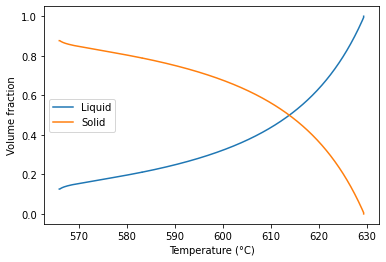

In [12]:
fig, ax = plt.subplots()

ax.plot(temp, v_frac_liq, label='Liquid')
ax.plot(temp, v_frac_sol, label='Solid')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Volume fraction')

plt.legend()
plt.show()

# Load EDS data

In [13]:
eds_path = Path('../data/EDS-MegaDendrite1.csv')
eds_path.exists()

True

In [14]:
# This file has a header that we need to ignore. 
# Uncomment the lines below to see the error raised without addressing this.
# eds_df = pd.read_csv(eds_path)
# eds_df.head()

In [15]:
eds_df = pd.read_csv(eds_path, header=15)
eds_df.head()

,,Point,Distance (um),O K,Al K,Ag L,Image,Frame
1,0.0,1.123,73.283,25.594,5905,1,,
2,1.0,2.143,72.798,25.059,13751,1,,
3,2.0,2.487,72.952,24.561,3060,1,,
4,3.0,2.652,72.626,24.721,5911,1,,
5,4.0,2.217,73.762,24.021,4317,1,,


In [16]:
eds_df = pd.read_csv(eds_path, header=15, index_col=False)
eds_df.head()

C:\Users\cgusb\Python\envs\img-proc-env\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return func(*args, **kwargs)


,Point,Distance (um),O K,Al K,Ag L,Image,Frame
0,1,0.0,1.123,73.283,25.594,5905,1
1,2,1.0,2.143,72.798,25.059,13751,1
2,3,2.0,2.487,72.952,24.561,3060,1
3,4,3.0,2.652,72.626,24.721,5911,1
4,5,4.0,2.217,73.762,24.021,4317,1


In [17]:
eds_df.tail()

,Point,Distance (um),O K,Al K,Ag L,Image,Frame
739,740,739.0,1.856,76.687,21.458,12208,1
740,741,740.0,1.192,77.026,21.783,9932,1
741,742,741.0,2.486,76.310,21.203,4702,1
742,743,742.0,1.832,76.513,21.654,18560,1
743,744,743.0,2.030,76.102,21.868,6724,1


In [18]:
eds_df.columns

Index(['Point', ' Distance (um)', ' O K', ' Al K', ' Ag L', ' Image',
       ' Frame'],
      dtype='object')

In [19]:
dist = eds_df[' Distance (um)'].to_numpy()
dist.dtype

dtype('float64')

In [20]:
ox = eds_df[' O K'].to_numpy()
ox.dtype

dtype('float64')

In [21]:
al = eds_df[' Al K'].to_numpy()
al.dtype

dtype('float64')

In [22]:
ag = eds_df[' Ag L'].to_numpy()
ag.dtype

dtype('float64')

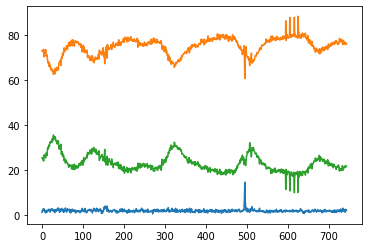

In [23]:
fig, ax = plt.subplots()

ax.plot(dist, ox)
ax.plot(dist, al)
ax.plot(dist, ag)

plt.show()

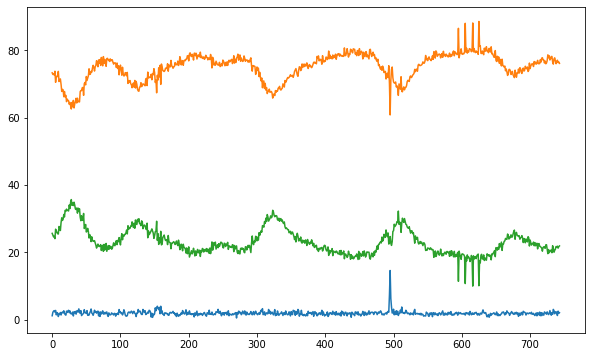

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(dist, ox)
ax.plot(dist, al)
ax.plot(dist, ag)

plt.show()

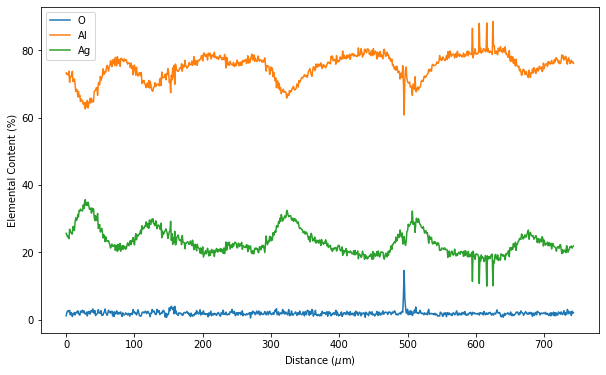

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(dist, ox, label='O')
ax.plot(dist, al, label='Al')
ax.plot(dist, ag, label='Ag')

ax.set_ylabel('Elemental Content (%)')
ax.set_xlabel('Distance ($\mu$m)')

plt.legend()
plt.show()